# Opioids Project: Data Science Memo

Ra'Kira Nelson and Alexa Fahrer

[GitHub Repository](https://github.com/rakiranelson/IDS590-Opioids-Final-Project)

In [1]:
import nbconvert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

opioids_prescriptions = pd.read_csv("data/opioids_clean.csv")
opioids_prescriptions = opioids_prescriptions.copy()
opioids_prescriptions = opioids_prescriptions.drop(columns=["Unnamed: 0"])

opioids_deaths = pd.read_csv("data/opioids_deaths.csv")
opioids_deaths = opioids_deaths.copy()
opioids_deaths = opioids_deaths.drop(columns=["Unnamed: 0"])

In [2]:
# control states for prescription shipments: Delaware, New Mexico
control_states_prescriptions = [
    "DELAWARE",
    "NEW MEXICO",
]
opioids_states_prescriptions = opioids_prescriptions[
    opioids_prescriptions["state"].isin(control_states_prescriptions + ["FLORIDA"])
]

# control states for overdoses: Colorado, Michigan, Nevada
control_states_od = [
    "COLORADO",
    "MICHIGAN",
    "NEVADA",
]
opioids_states_od = opioids_deaths[
    opioids_deaths["state"].isin(control_states_od + ["FLORIDA"])
]

## Stakeholders

This memo is written for Policy Analysts at the Florida Department of Health and the United States Drug Enforcement Agency. The intended reader has strong policy expertise and moderate technical familiarity with public health metrics, but may not necessarily be a data scientist.

## Executive Summary

The United States experienced a rapid increase in the amount of prescription opioids and overdose deaths during the late 2000s, and the state of Florida especially became a hotspot for opioid prescriptions and use. To combat this over-prescription issue, Florida implemented opioid prescribing restrictions starting in 2010. This memo intends to evaluate the effectiveness of these regulations by analyzing whether they reduced prescription opioid shipments and overdose mortality, using county-level data from 2006 to 2015 and comparing Florida to other states with similar pre-policy opioid prescription and overdose trends.

Our findings show that Florida’s 2010 opioid regulations were associated with a large reduction in prescription opioid shipments, beginning immediately after the policy went into effect. However, overdose deaths declined only temporarily before rising again in later years. This result is consistent with concerns that reducing access to prescription opioids would push some people toward illicit opioids such as heroin or fentanyl. These results suggest that prescribing policies are effective at reducing the supply of prescription opioids, but they could be more effective to sustainably reduce overdose deaths.

## Decisions To Be Made

Based on this analysis, the Florida Department of Health faces two decisions:

1. Should Florida continue or expand the regulations on opioid prescribers?

The evidence in this analysis strongly suggests that these measures are effective in reducing opioid prescriptions.

2. Should Florida implement further regulations to prevent overdose deaths?

The analysis showed that the policies were not as effective in reducing overdose deaths as they were in reducing opioid prescriptions.

## Background and Research Questions

Over the past two decades, Florida has faced one of the most severe prescription-opioid crises in the United States. Prescription pain medications were both overly available and misused in high amounts, leading to rising addiction rates and overdose deaths. Florida became a national center of this crisis: by 2010, 98 of the 100 highest-volume oxycodone-dispensing physicians in the United States were operating in Florida, and hundreds of loosely regulated pain clinics were distributing large quantities of opioids with little medical justification.

For the Florida Department of Health and the Drug Enforcement Agency, this situation presented a clear and urgent policy problem: excessive and inappropriate opioid prescription led to addiction and death. Florida policymakers and state health officials had authority to intervene in the operation of pain clinics, behavior of doctors, and oversight of controlled-substance dispensing.

In response to this problem, Florida implemented regulations beginning in 2010. These included mandatory pain-clinic registration, aggressive multi-agency enforcement operations, restrictions on physician dispensing, establishment of a statewide Prescription Drug Monitoring Program (PDMP), required reporting from dispensers, and expanded regulation of wholesale distributors. Together, these measures were designed to reduce opioid prescribing and availability in Florida. However, some feared that regulating prescribed opioids would force users to turn to illicit opioids such as heroin and fentanyl that are even more dangerous. 

This memo seeks to understand the impact of Florida's 2010 opioid prescribing regulations on 1) the volume of opioids prescribed, and 2) drug overdose deaths. The central research question is: 
* Did Florida’s 2010 opioid prescribing regulations reduce the volume of opioids and overdose deaths in the state?

We hypothesize that the regulations decreased the volume of opioids prescribed but was not as effective at reducing the overall rate of overdose deaths in Florida. 

By providing a causal estimate of the policies’ impact, this analysis allows the Florida Department of Health and the Drug Enforcement Agency to make informed decisions about continuing, expanding, or changing these interventions.

## Methodology

The goal of this analysis is to determine whether Florida’s 2010 regulations actually reduced the availability of prescription opioids and overdose deaths. To answer this, we use a difference-in-difference approach that compares changes in outcomes in Florida to changes in similar states that did not implement comparable regulations at the same time. This approach helps isolate the impact of the policy from unrelated factors that affected all states simultaneously but are not under the Department of Health’s control.

Our analysis uses county-level data from 2006 to 2015 on two outcomes directly related to the Department of Health’s responsibilities:

1. Prescription opioid shipments in grams per 1,000 residents, which reflects the volume in grams of legally distributed opioids in Florida; and

2. Opioid overdose deaths per 100,000 residents.

The data was gathered from federal datasets: prescription shipments from the DEA’s ARCOS system, overdose mortality from US Vital Statistics, and annual county populations from the US Census. Since overdose data are censored in small counties, we follow public-health best practices by restricting the analysis for overdose deaths to counties with populations above 350,000.

A key requirement of difference-in-difference analysis is that Florida must be compared to states with similar pre-policy trends. To satisfy this, we identify sets of control states for both outcomes whose 2006-2009 trends closely match Florida’s. This ensures that any post-2010 differences in the outcomes between Florida and the controls is due to Florida’s policies rather than pre-existing differences. Prior to the policy change, both Florida and the control states exhibit similar upward trends, indicating that the groups are comparable and supporting the use of a difference-in-difference framework. We then compare Florida’s changes in opioids volume and overdose deaths to those of the selected control states before and after the 2010 regulations.

##### Choosing Control States:
- Before comparing overdose or prescription patterns, we first explored the states that had similar population size to Florida prior to 2010 since we assume opioid deaths and prescription volumes tend to scale with population size. For each state, we calculated the average population for each year between 2006 and 2009 and compared it to Florida’s average population during the same period. We used different thresholds for selecting states, such as those with populations within ±10%, ±15%, and ±30% of Florida’s average population. 

- Next, we compared how overdose rates and prescription shipment trends changed over time. It’s reasonable for us to conclude that states whose year-to-year differences move in similar ways to Florida’s may act as good control states, since they exhibit similar trends. We calculated how overdose rates and prescription shipments changed from year to year for the years 2006–2009 for Florida and all other states in our dataframe. We then computed the absolute differences between Florida’s yearly changes and each candidate state’s yearly changes and summed up the values such that smaller sums would suggest more similar slopes. States that had similar trends (i.e. slopes) to Florida for both overdose rates and prescription shipments were considered the strongest controls. 

 - There weren’t many states that met all requirements, so in our pursuit for identifying control states, we prioritized those with trends most similar to Florida over similar average population size.


By examining both the changes in prescription opioid shipments and the public health impact of changes in overdose deaths, this approach will inform the Department of Health in determining whether Florida’s policies are effective tools. If the analysis finds declines in Florida for both outcomes following the policy change, this provides strong evidence that the Department’s regulations over prescribers and dispensing practices is an effective way to improve public health outcomes related to opioids. If overdose deaths do not decrease as much as prescription volumes, then the results might suggest that other policies could better target overdoses.

## Results

We first analyze the effectiveness of the policies in reducing the volume of opioids, measured through the grams of opioid shipments per 1,000 people. 

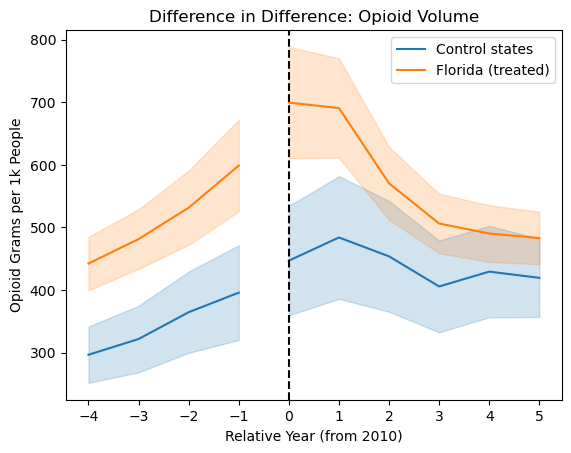

In [3]:
colors = ["tab:blue", "tab:orange"]
pre_prescriptions = opioids_states_prescriptions[
    opioids_states_prescriptions["year"] < 2010
]
post_prescriptions = opioids_states_prescriptions[
    opioids_states_prescriptions["year"] >= 2010
]

pre_prescription_trends = (
    pre_prescriptions.groupby(["policy_state", "relative_year"])[
        "prescriptions_per_1000"
    ]
    .agg(["mean", "std", "count"])
    .reset_index()
)
pre_prescription_trends["se"] = pre_prescription_trends["std"] / np.sqrt(
    pre_prescription_trends["count"]
)

post_prescription_trends = (
    post_prescriptions.groupby(["policy_state", "relative_year"])[
        "prescriptions_per_1000"
    ]
    .agg(["mean", "std", "count"])
    .reset_index()
)
post_prescription_trends["se"] = post_prescription_trends["std"] / np.sqrt(
    post_prescription_trends["count"]
)


fig_pres, ax_pres = plt.subplots()

# part of the graph before 2010
for group, d in pre_prescription_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    # mean line
    ax_pres.plot(
        d["relative_year"],
        d["mean"],
        label=label,
        color=colors[group],
    )
    # SE shading
    ax_pres.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

# part of the graph after 2010
for group, d in post_prescription_trends.groupby("policy_state"):
    # mean line
    ax_pres.plot(
        d["relative_year"],
        d["mean"],
        color=colors[group],
    )
    # SE shading
    ax_pres.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

ax_pres.axvline(0, color="black", linestyle="--")
ax_pres.set(
    title="Difference in Difference: Opioid Volume",
    xlabel="Relative Year (from 2010)",
    ylabel="Opioid Grams per 1k People",
    xticks=sorted(opioids_states_prescriptions["relative_year"].unique()),
)
ax_pres.legend()
plt.show()

**Figure 1. Difference in Difference: Opioid Volume**

Figure 1 shows how the volume of prescription opioids per 1,000 people changed in Florida compared to the selected control states- Delaware and New Mexico- before and after Florida’s 2010 prescribing regulations.

Immediately after the regulations were implemented (relative year 0), Florida’s opioid shipments decline sharply and continue decreasing, dropping far more steeply than in control states. This pattern begins in the first post-policy year and continues for several years, whereas the control states experience only a modest reduction over the next five years. Florida experienced a larger reduction in shipments than the control states, as shown by the narrowing gap between Florida and the controls. This indicates a large reduction in the supply of prescription opioids within Florida due to the policies.

The results strongly suggest that Florida’s 2010 opioid regulations were effective at reducing the volume of prescription opioids entering the supply, achieving the intended goal of reducing inappropriate prescribing and opioid use.

Next, we examine the effectiveness of the policies in reducing the number of overdose deaths, measured through the number of overdose deaths per 100,000 people.

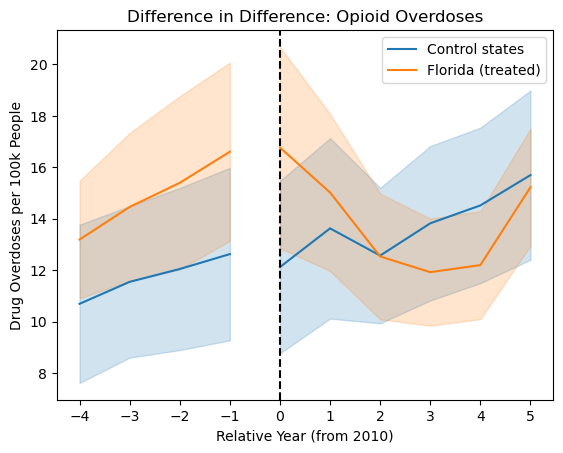

In [4]:
colors = ["tab:blue", "tab:orange"]
pre_od = opioids_states_od[opioids_states_od["year"] < 2010]
post_od = opioids_states_od[opioids_states_od["year"] >= 2010]

pre_overdose_trends = (
    pre_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .agg(["mean", "std", "count"])
    .reset_index()
)
pre_overdose_trends["se"] = pre_overdose_trends["std"] / np.sqrt(
    pre_overdose_trends["count"]
)

post_overdose_trends = (
    post_od.groupby(["policy_state", "relative_year"])["overdose_per_100k"]
    .agg(["mean", "std", "count"])
    .reset_index()
)
post_overdose_trends["se"] = post_overdose_trends["std"] / np.sqrt(
    post_overdose_trends["count"]
)


fig_post, ax_post = plt.subplots()

# part of the graph before 2010
for group, d in pre_overdose_trends.groupby("policy_state"):
    label = "Florida (treated)" if group == 1 else "Control states"
    # mean line
    ax_post.plot(
        d["relative_year"],
        d["mean"],
        label=label,
        color=colors[group],
    )
    # SE shading
    ax_post.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

# part of the graph after 2010
for group, d in post_overdose_trends.groupby("policy_state"):
    # mean line
    ax_post.plot(
        d["relative_year"],
        d["mean"],
        color=colors[group],
    )
    # SE shading
    ax_post.fill_between(
        d["relative_year"],
        d["mean"] - 1.96 * d["se"],
        d["mean"] + 1.96 * d["se"],
        color=colors[group],
        alpha=0.2,
    )

ax_post.axvline(0, color="black", linestyle="--")
ax_post.set(
    title="Difference in Difference: Opioid Overdoses",
    xlabel="Relative Year (from 2010)",
    ylabel="Drug Overdoses per 100k People",
    xticks=sorted(opioids_states_prescriptions["relative_year"].unique()),
)
ax_post.legend()
plt.show()

**Figure 2. Difference in Difference: Opioid Overdoses**

Figure 2 shows the change in opioid overdose deaths in Florida compared to the control states following the 2010 prescribing regulations.

Immediately after the policy is implemented (relative years 0 to 2), Florida experiences a temporary decline in overdose deaths, while the control states continue on an upward trajectory. This suggests that the restrictions may have produced short-term reductions in overdose mortality by reducing access to high-risk prescription opioids.

However, beginning around years 3 to 5, the trend reverses: overdose deaths in Florida begin rising again and eventually narrows toward the control states. This pattern is consistent with concerns that reductions in prescription opioid availability may lead some individuals with opioid use disorder to transition toward illicit opioids with substantially higher overdose risk. 

Overall, the results indicate that while Florida’s 2010 prescribing regulations produced a short-term reduction in overdose mortality, the effect was not sustained in further years.

## Conclusion

Florida’s 2010 opioid-prescribing regulations were designed to reduce inappropriate prescribing and overdoses. This analysis finds that the regulations achieved a large decrease in the volume of prescription opioid shipments, beginning immediately after the policy implementation. This indicates that prescriber-focused regulations are an effective way of reducing the supply of high-risk opioids. However, the policies produced only a temporary decrease in overdose deaths, and mortality began rising again several years later. This pattern suggests that reducing prescription opioid availability alone is not enough to generate long-term reductions in opioid-related overdoses. Users may have turned toward illicit and more dangerous opioids when prescription access was regulated.

Taken together, these findings imply that Florida should continue enforcing prescriber regulations while also investing in other strategies that directly target overdoses, such as expanding access to medication-assisted treatment, strengthening harm-reduction programs, and improving surveillance of illicit opioid markets. Other states in the US could follow Florida's example to limit drug addiction and harm. 

## Appendix

The figures below present pre–post comparisons for Florida, showing how prescription opioid volume and overdose mortality changed before and after the 2010 policy implementation. These plots are included for completeness, as pre–post comparisons form the foundation for the difference-in-difference approach used in the main analysis.

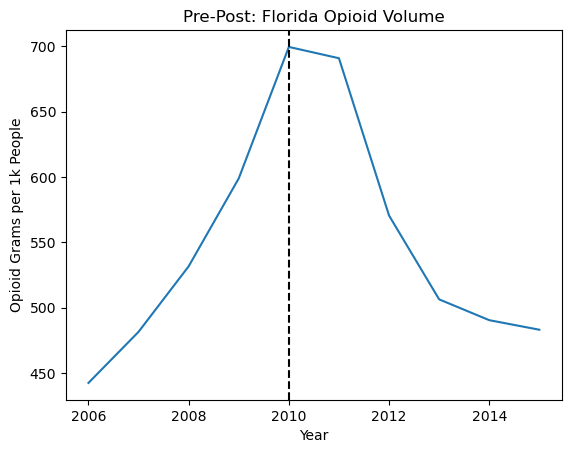

In [5]:
fl = opioids_states_prescriptions[opioids_states_prescriptions["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["prescriptions_per_1000"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Volume")
plt.ylabel("Opioid Grams per 1k People")
plt.xlabel("Year")
plt.show()

**Figure 3. Pre-Post: Opioid Volume**

This figure shows prescription opioid volume in grams per 1,000 residents in Florida from 2006 to 2015. Volume rises steadily from 2006 to 2009, then declines sharply after the 2010 regulations. The pre–post pattern suggests a large reduction in the supply of prescription opioids following the policy change.

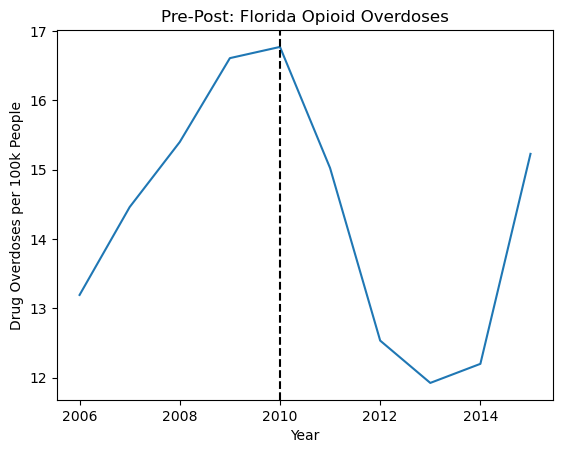

In [6]:
fl = opioids_states_od[opioids_states_od["state"] == "FLORIDA"]
mean_fl = fl.groupby("year")["overdose_per_100k"].mean()

plt.plot(mean_fl.index, mean_fl.values)
plt.axvline(2010, linestyle="--", color="black")
plt.title("Pre-Post: Florida Opioid Overdoses")
plt.ylabel("Drug Overdoses per 100k People")
plt.xlabel("Year")
plt.show()

**Figure 4. Pre-Post: Opioid Overdoses**

This figure shows Florida’s overdose deaths per 100,000 residents from 2006 to 2015. Overdose mortality rises steadily prior to 2010, decreases briefly in the first three years after the policy, and then begins rising again. This pattern is the need for a comparison group, as statewide or national factors unrelated to Florida’s policy could be influencing these trends.